# Customer Churn Analysis & Prediction
*Author: Aiden Fontes*  
*Date: 29 July 2025*  

---

## 1. Introduction

### Project Overview
In this project, we analyze customer churn for a telecommunications company to:
- Identify key factors that contribute to churn.
- Build a predictive model to flag at-risk customers.
- Provide actionable recommendations for reducing churn.

### Business Questions
1. Which customer segments have the highest churn?
2. How do contract type, internet service, and monthly charges affect churn?
3. Can we predict churn with reasonable accuracy?

### Tools Used
- **SQL:** Data exploration and aggregation.
- **Python:** Data cleaning, modeling, and visualization.
- **Tableau:** Interactive dashboard creation.

---

## 2. Data Preparation

### Load the Data

In [2]:
import pandas as pd

# Load CSV (adjust path)
df = pd.read_csv(r"/Users/katherinefontes/Desktop/churn_data_project/churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data cleaning
- Convert TotalCharges to numeric
- Remove missing or invalid values

In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# Convert TotalCharges to numeric BEFORE encoding
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)   # Fill blanks with 0 (or median)

---
## 3. Exploratory Data Analysis in SQL

### Churn by Contract Type
```sql
SELECT Contract,
				COUNT(*) AS total_customers,
				SUM(CASE WHEN Churn='Yes' THEN 1 ELSE  0 END) AS Churned,
				ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE  0 END)*1.0 / COUNT(*) * 100, 2) AS ChurnRate	
FROM churn_data
GROUP BY Contract
ORDER BY ChurnRate DESC;

![Contract](contract.png)

### Churn by Internet Service
```sql
SELECT InternetService,
				COUNT(*) AS total_customers,
				SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS Churned,
				ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE  0 END)*1.0 / COUNT(*) * 100, 2) AS ChurnRate					
FROM churn_data
GROUP BY InternetService
ORDER BY ChurnRate DESC;

![Internet](internet.png)

### Churn by Monthly and Total Charges
```sql
SELECT Churn,
				ROUND(AVG(MonthlyCharges), 2) AS AvgMonthlyCharges,
				ROUND(AVG(TotalCharges), 2) AS AvgTotalCharges
FROM churn_data
GROUP BY Churn;

![Charges](Charges.png)

### Churn by Tenure
```sql
SELECT 
			CASE
				WHEN tenure BETWEEN 0 AND 12 THEN '0 - 12 months'
				WHEN tenure BETWEEN 13 AND 24 THEN '13 - 24 months'
				WHEN tenure BETWEEN 25 AND 36 THEN '25 - 36 months'
				WHEN tenure BETWEEN 37 AND 48 THEN '37 - 48 months'
				WHEN tenure BETWEEN 49 AND 60 THEN '49 - 60 months'
				ELSE '61+ months'
			END AS 'TenureGroup',
			COUNT(*) AS TotalCustomers,
			SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS Churned,
			ROUND(SUM(CASE WHEN Churn='Yes' THEN 1 ELSE  0 END)*1.0 / COUNT(*) * 100, 2) AS ChurnRate		
FROM churn_data
GROUP BY TenureGroup
ORDER BY ChurnRate DESC;

![Tenure](Tenure.png)

---
## 4. Exploratory Data Analysis in Python

### Churn Distribution

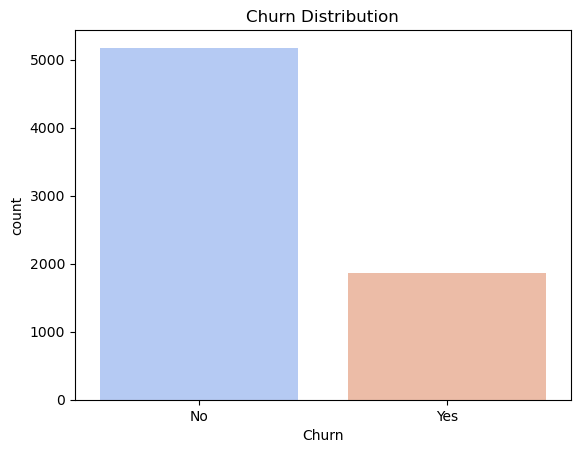

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn', hue='Churn', palette='coolwarm', legend=False)
plt.title('Churn Distribution')
plt.show()

In [19]:
# Count values
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

summary = pd.DataFrame({
    'Count': churn_counts,
    'Percentage': churn_percent.round(2)
})

print(summary)

       Count  Percentage
Churn                   
No      5174       73.46
Yes     1869       26.54


- Most customers did not churn (approximately 75%)
- However over 25% of customers did churn which warrents further analysis

### Churn by Contract Type

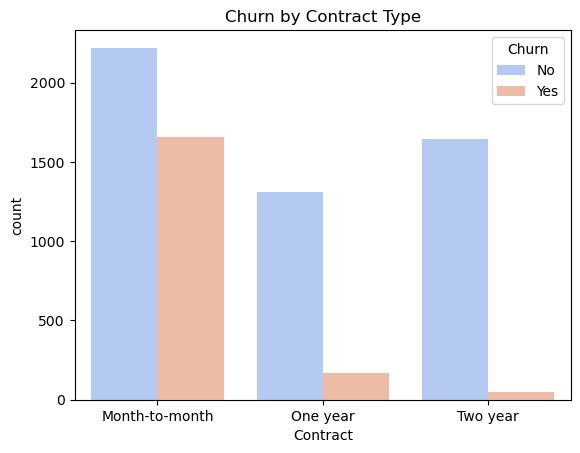

In [20]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn by Contract Type')
plt.show()

In [21]:
# Count and percentage of each contract type
contract_counts = df['Contract'].value_counts()
contract_percent = df['Contract'].value_counts(normalize=True) * 100

summary = pd.DataFrame({
    'Count': contract_counts,
    'Percentage': contract_percent.round(2)
})

print(summary)

                Count  Percentage
Contract                         
Month-to-month   3875       55.02
Two year         1695       24.07
One year         1473       20.91


- Customers with month-to-month contracts predominate (55%) creating a potential subset of customers likely to churn
- Customers with one and two year contracts have much lower churn rates

### Churn by Internet Service

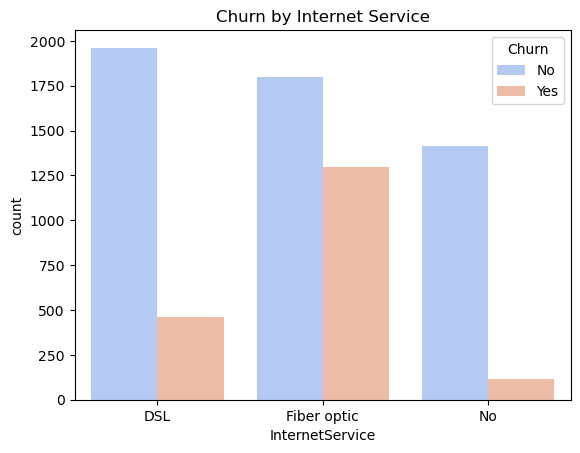

In [7]:
sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')
plt.title('Churn by Internet Service')
plt.show()

In [12]:
# Crosstab of InternetService vs Churn
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_counts = df['InternetService'].value_counts()

# Combine counts and churn percentages
summary = internet_churn.round(2)
summary['Total Customers'] = internet_counts
summary = summary[['Total Customers', 'No', 'Yes']]  # Reorder columns
summary.columns = ['Total Customers', 'No Churn (%)', 'Churn (%)']

print(summary)

                 Total Customers  No Churn (%)  Churn (%)
InternetService                                          
DSL                         2421         81.04      18.96
Fiber optic                 3096         58.11      41.89
No                          1526         92.60       7.40


- It can be seen that customers with Fiber optic internet service have a much higher churn rate (41%) and contain a larger subset of customers

### Boxplot: Monthly Charges V Churn

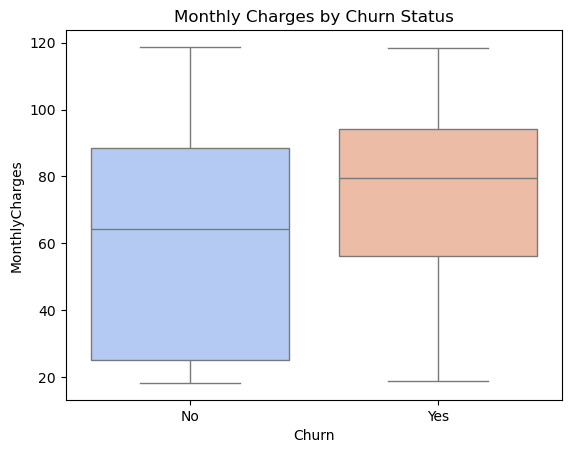

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [13]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm', hue='Churn', legend=False)
plt.title('Monthly Charges by Churn Status')
plt.show()
df.groupby('Churn')['MonthlyCharges'].describe()

- Churned customers on average pay higher monthly charges
- Non-churned customers have a larger distribution of monthly charges with many paying low monthly fees

---

## 5. Predictive Modelling

### Data Preprocessing

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

df = pd.read_csv(r"/Users/katherinefontes/Desktop/churn_data_project/churn_data.csv")

In [27]:
# 1. Drop customerID
df = df.drop('customerID', axis=1)

# 2. Encode only the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [28]:
# split data into training and test sets. 30% of data will be for test and 70% for training.
# set a fixed random seed so the split is reproducible.
# Ensure numeric
y = df['Churn_Yes'].astype(int)   # Convert True → 1, False → 0
X = df.drop('Churn_Yes',  axis=1)
X = X.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Build a model

In [29]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

### Model Evaluation

In [30]:
# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



### Class 0 (No Churn)
- Precision = 0.85 → When the model predicts "No Churn," it’s correct 85% of the time.

- Recall = 0.90 → It successfully catches 90% of the actual non‑churners.

- F1 = 0.88 → Very strong at identifying non‑churn customers.

### Class 1 (Churn)
- Precision = 0.69 → When the model predicts "Churn," it’s correct 69% of the time.

- Recall = 0.57 → It catches 57% of actual churners (meaning it misses ~43%).

- F1 = 0.62 → Moderate performance for churn detection; could be improved.

### What this means
- This model is much better at predicting customers who won’t churn than those who will.

- Churn detection (Recall = 0.57) is relatively low → model is missing nearly half of the churners, which may be a problem for retention strategies.

- Precision for churn (0.69) is reasonable, meaning most customers flagged as likely churners really are at risk.

---

## 6. Tableau Dashboard
To make the analysis interactive, I built a Tableau dashboard summarizing key churn metrics.

**Live Dashboard:** [View on Tableau Public](https://public.tableau.com/app/profile/aiden.fontes/viz/ChurnAnalysis_17539352623890/Dashboard3?publish=yes&showOnboarding=true)

![Tableau Screenshot](tableau_dashboard.png)

---

## 7. Insights and Recommendations

### Key Findings

- Month-month customers have the highest churn rate
- Customers with fiber optic internet service have a higher churn rate
- Customers who have churned pay higher monthly fees on average
- Customers with a tenure less then one year have the highest churn rate

### Recommendations

- Incentivise customers to commit to one and/or two year contracts
- Offer discounts to customers with fiber optic internet service
- Offer loyaly programs and rewards to high paying customers

---

## 8. References

1. [Telco Customer Churn Dataset](kaggle.com/datasets/blastchar/telco-customer-churn/code)
2. [Scikit Learn Documentation](https://scikit-learn.org/stable/)
3. [Tabeau Public](https://public.tableau.com/app/discover)